In [1]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # загрузим датасет

images, labels = (x_train[0:1000].reshape(1000, 28 * 28) / 255, y_train[0:1000])

one_hot_labels = np.zeros((len(labels), 10))

for i, l in enumerate(labels):
    one_hot_labels[i][l] = 1
labels = one_hot_labels

test_images = x_test.reshape(len(x_test), 28 * 28) / 255
test_labels = np.zeros((len(y_test), 10))
for i, l in enumerate(y_test):
    test_labels[i][l] = 1

np.random.seed()
alpha = 0.005
max_iterations = 100
input_layer_size = len(images[0])
hidden_layer_size = 100
output_layer_size = 10

weights_0_1 = 0.2 * np.random.random((input_layer_size, hidden_layer_size)) - 0.1
weights_1_2 = 0.2 * np.random.random((hidden_layer_size, output_layer_size)) - 0.1

relu = lambda x: (x > 0) * x
relu_deriv = lambda x: x >= 0

for iteration in range(max_iterations):
    error_prediction = 0
    correct_cnt = 0
    
    for i in range(len(images)):
        layer_0 = images[i:i+1]
        layer_1 = relu(np.dot(layer_0, weights_0_1))
        dropout_mask = np.random.randint(2, size = layer_1.shape)
        layer_1 *= dropout_mask * 2
        layer_2 = np.dot(layer_1, weights_1_2)
        
        error_prediction += np.sum((labels[i:i+1] - layer_2) ** 2)
        correct_cnt += int(np.argmax(layer_2)) == np.argmax(labels[i:i+1])
        
        layer_2_delta = (labels[i:i+1] - layer_2)
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu_deriv(layer_1)
        layer_1_delta *= dropout_mask
        
        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)
    
    if ((iteration % 10 == 0) or (iteration == max_iterations - 1)):
        test_error_prediction = 0
        test_correct_cnt = 0
    
        for i in range(len(test_images)):
            layer_0 = test_images[i:i+1]
            layer_1 = relu(np.dot(layer_0, weights_0_1))
            layer_2 = np.dot(layer_1, weights_1_2)
        
            test_error_prediction += np.sum((test_labels[i:i+1] - layer_2) ** 2) 
            test_correct_cnt += int(np.argmax(layer_2) == np.argmax(test_labels[i:i+1]))
        
        print("\r" + \
              " Iteration: " + str(iteration) + \
              " Error: " + str(error_prediction / float(len(images)))[0:5] + \
              " Correct: " + str(correct_cnt / float(len(images))) + \
              " Test_Error: " + str(test_error_prediction / float(len(test_images)))[0:5] + \
              " Test_Correct: " + str(test_correct_cnt / float(len(test_images)))
        )

 Iteration: 0 Error: 0.887 Correct: 0.394 Test_Error: 0.653 Test_Correct: 0.611
 Iteration: 10 Error: 0.455 Correct: 0.778 Test_Error: 0.441 Test_Correct: 0.7971
 Iteration: 20 Error: 0.436 Correct: 0.807 Test_Error: 0.420 Test_Correct: 0.8038
 Iteration: 30 Error: 0.402 Correct: 0.834 Test_Error: 0.407 Test_Correct: 0.8173
 Iteration: 40 Error: 0.389 Correct: 0.844 Test_Error: 0.405 Test_Correct: 0.8165
 Iteration: 50 Error: 0.367 Correct: 0.851 Test_Error: 0.394 Test_Correct: 0.8254
 Iteration: 60 Error: 0.373 Correct: 0.87 Test_Error: 0.386 Test_Correct: 0.8282
 Iteration: 70 Error: 0.365 Correct: 0.86 Test_Error: 0.389 Test_Correct: 0.825
 Iteration: 80 Error: 0.344 Correct: 0.884 Test_Error: 0.384 Test_Correct: 0.8308
 Iteration: 90 Error: 0.357 Correct: 0.871 Test_Error: 0.382 Test_Correct: 0.8307
 Iteration: 99 Error: 0.342 Correct: 0.886 Test_Error: 0.385 Test_Correct: 0.8267


5


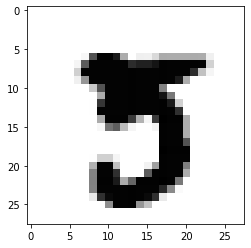

In [3]:
index = 412
layer_0 = test_images[index]
layer_1 = relu(np.dot(layer_0, weights_0_1))
layer_2 = np.dot(layer_1, weights_1_2)
print(np.argmax(layer_2))
plt.imshow(x_test[index], cmap='Greys')

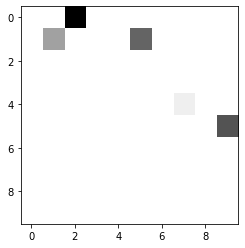

In [4]:
plt.imshow(layer_1.reshape(10,10), cmap='Greys')

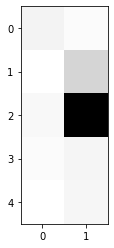

In [5]:
plt.imshow(layer_2.reshape(5,2), cmap='Greys')

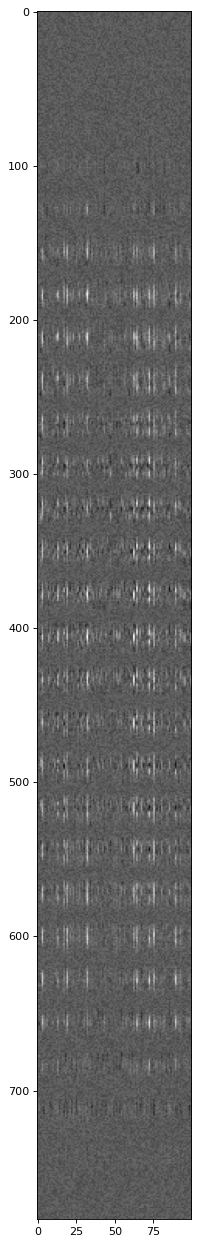

In [6]:
plt.figure(figsize = (20, 20), dpi = 80)
plt.imshow(weights_0_1.reshape(28 * 28, 100), cmap='Greys')

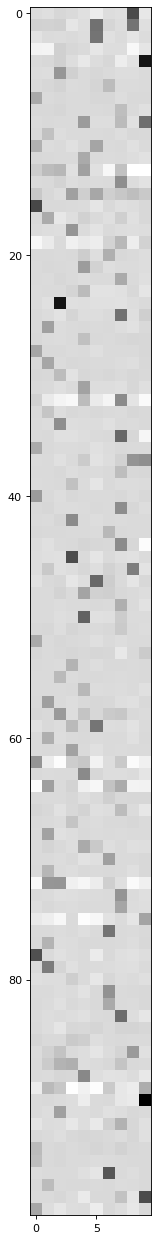

In [7]:
plt.figure(figsize = (20, 20), dpi = 80)
plt.imshow(weights_1_2.reshape(100, 10), cmap='Greys')